**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

Image Lables

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

Building the Neural Network

In [47]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [48]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3035 - accuracy: 0.9107
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1385 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1015 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0824 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0684 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0420 - accuracy: 0.9858
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.037

Training data accuracy = 98.9%

**Accuracy on Test data:**

In [50]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1111 - accuracy: 0.9725
0.9725000262260437


Test data accuracy = 97.1%

In [51]:
print(X_test.shape)

(10000, 28, 28)


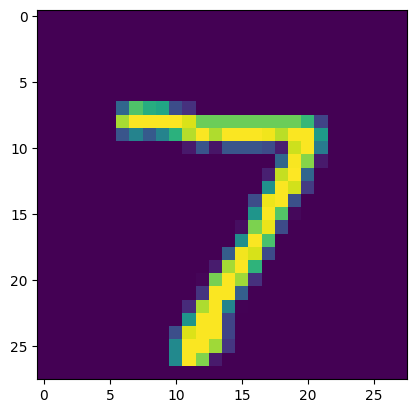

In [52]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [53]:
print(Y_test[0])

7


In [54]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [55]:
print(Y_pred.shape)

(10000, 10)


In [56]:
print(Y_pred[0])

[8.7483123e-02 3.5993916e-01 1.2738161e-01 5.3904659e-01 1.0170368e-03
 5.6376565e-01 1.2048777e-06 9.9999630e-01 5.8291033e-02 8.6390442e-01]


model.predict() gives the prediction probability of each class for that data point

In [57]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [58]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [59]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [60]:
print(conf_mat)

tf.Tensor(
[[ 962    0    1    1    0    7    4    1    4    0]
 [   0 1124    1    2    0    2    2    0    4    0]
 [   3    7  990   13    3    1    0    4   10    1]
 [   0    0    0  976    0   24    0    3    5    2]
 [   0    0    8    0  959    3    2    0    0   10]
 [   2    0    0    8    1  875    0    2    2    2]
 [   2    4    0    2    2    8  934    0    6    0]
 [   1    4    8    5    2    4    0  988    7    9]
 [   2    0    2    8    3   16    0    1  937    5]
 [   1    2    0    2   12    7    0    3    4  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

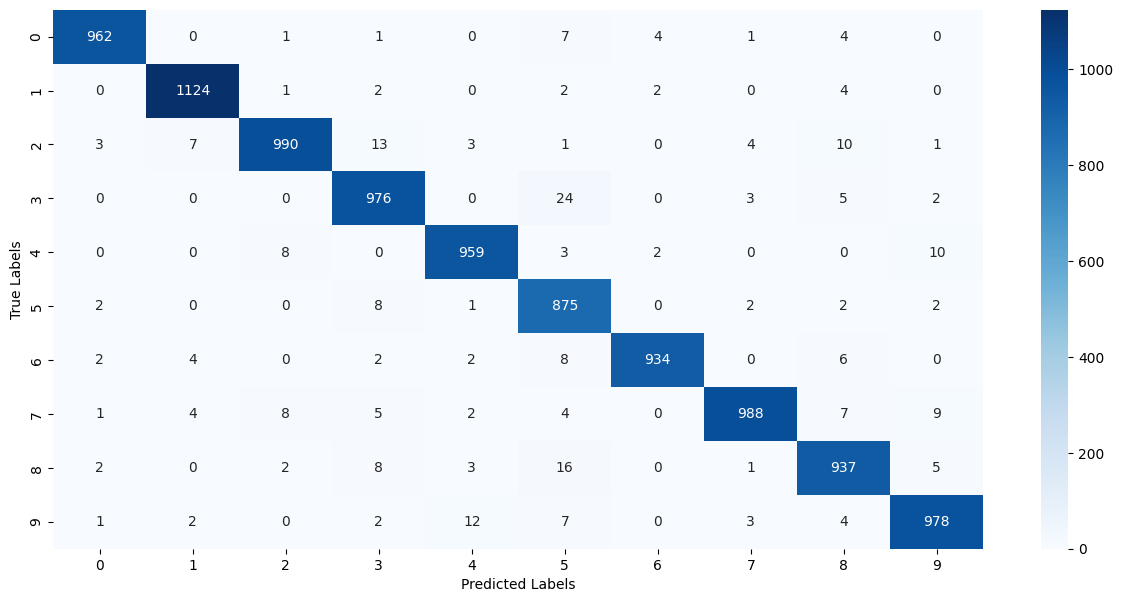

In [61]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

Path of the image to be predicted: test.jpg
1/1 [==============================] - 0s 47ms/step
The Handwritten Digit is recognised as  4


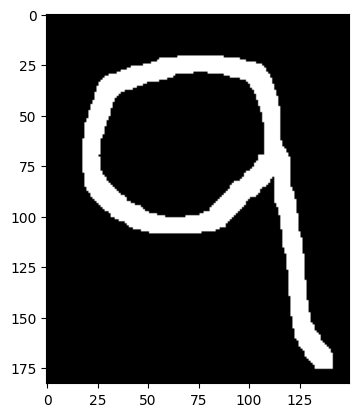

In [65]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)